In [1]:
!git clone https://github.com/millermuttu/TSAI-EVA5.git
!pip install -q -U albumentations
!echo "$(pip freeze | grep albumentations) is successfully installed"

Cloning into 'TSAI-EVA5'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 174 (delta 64), reused 100 (delta 26), pack-reused 0
Receiving objects: 100% (174/174), 828.54 KiB | 8.63 MiB/s, done.
Resolving deltas: 100% (64/64), done.
     |████████████████████████████████| 122kB 4.8MB/s 
     |████████████████████████████████| 952kB 15.3MB/s 
albumentations==0.4.6 is successfully installed


In [2]:
cd /content/TSAI-EVA5/week9/

/content/TSAI-EVA5/week9


In [20]:
import torch
import dataset
import models
import utils
import numpy as np
from torchvision import transforms
from train_test import train, test

In [4]:

# import albumentations as A
# from albumentations.pytorch import ToTensorV2

# transform_train = A.Compose([
#                              A.HorizontalFlip(),
#                              A.Rotate(limit=5),
#                              A.Cutout(num_holes=4,max_h_size=4,max_w_size=4),
#                             #  A.RandomCrop(32,32),
#                              A.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
#                              ToTensorV2(),

# ])

# transform_test = A.Compose([
#                             A.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
#                             ToTensorV2(),

# ])

In [5]:
cuda, device = utils.others.initialize_device(utils.config.SEED)

GPU Available? True


In [6]:
trainset = dataset.pytorch_datasets(True, True, dataset_name='cifar10')
testset = dataset.pytorch_datasets(False, True, dataset_name='cifar10')

Extracting /content/TSAI-EVA5/week9/dataset/cifar10/cifar-10-python.tar.gz to /content/TSAI-EVA5/week9/dataset/cifar10
Files already downloaded and verified


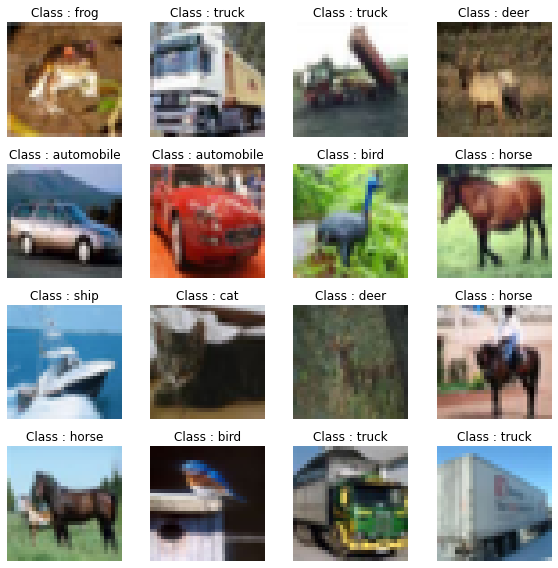

In [7]:
utils.visualization.show_imgs(trainset, 16, (8, 8))

In [8]:
mean, std = utils.img_reg.get_stats(trainset)[0], utils.img_reg.get_stats(trainset)[1]
print(mean, std)

(0.4914, 0.4822, 0.4465) (0.247, 0.2435, 0.2616)


In [9]:
transformations_list = [transforms.Normalize(mean, std)]
augmentations_list = [transforms.RandomRotation(7), 
                      transforms.RandomHorizontalFlip(0.3)]

In [10]:
trainset = dataset.pytorch_datasets(True, True, transformations_list, augmentations_list, dataset_name='cifar10')
testset = dataset.pytorch_datasets(False, True, transformations_list, dataset_name='cifar10')
train_dl = dataset.data_loader(trainset, utils.config.BATCH_SIZE, utils.config.NUM_WORKERS, cuda, shuffle=True)
test_dl = dataset.data_loader(testset, utils.config.BATCH_SIZE, utils.config.NUM_WORKERS, cuda, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


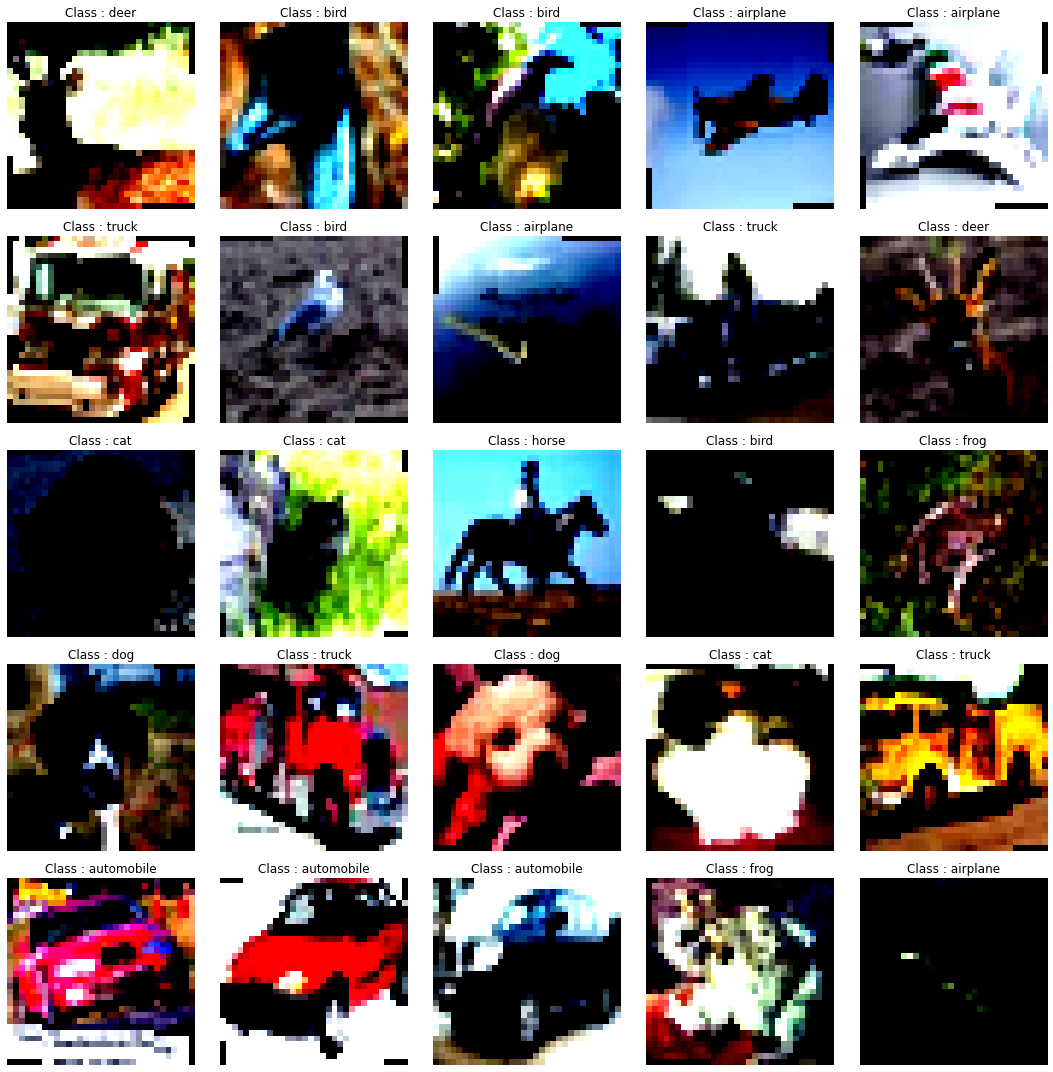

In [11]:
utils.visualization.show_batch(train_dl)

In [12]:
#Define model
model = models.ResNet18().to(device)

In [13]:
utils.others.summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [14]:
utils.config.EPOCHS

15

In [15]:
model = models.ResNet18().to(device)
loss_fn = utils.others.cross_entropy_loss_fn()
optimizer = utils.others.sgd_optimizer(model)
scheduler = utils.others.StepLR_scheduler(optimizer, step_size=6)
if utils.config.DEBUG == True:
    utils.config.EPOCHS = 15

test_loss = []
test_accuracy = []
train_losses = []
train_accuracy = []
misclassified_imgs = []
for epoch in range(utils.config.EPOCHS):
    print(f"Running Epoch {epoch+1}/{utils.config.EPOCHS}\n")
    train(model, train_dl, optimizer, loss_fn, device, train_losses, train_accuracy)
    scheduler.step()
    test(model, test_dl, loss_fn, device, 25, test_loss, test_accuracy, misclassified_imgs)

  0%|          | 0/1563 [00:00<?, ?it/s]

Running Epoch 1/15



  0%|          | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0382, Accuracy: 5876/10000 (58.76%)

Running Epoch 2/15



  0%|          | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0227, Accuracy: 7493/10000 (74.93%)

Running Epoch 3/15



  0%|          | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0195, Accuracy: 7838/10000 (78.38%)

Running Epoch 4/15



  0%|          | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0173, Accuracy: 8125/10000 (81.25%)

Running Epoch 5/15



  0%|          | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0164, Accuracy: 8248/10000 (82.48%)

Running Epoch 6/15



  0%|          | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0156, Accuracy: 8296/10000 (82.96%)

Running Epoch 7/15



  0%|          | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0119, Accuracy: 8722/10000 (87.22%)

Running Epoch 8/15



  0%|          | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0118, Accuracy: 8748/10000 (87.48%)

Running Epoch 9/15



  0%|          | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0116, Accuracy: 8788/10000 (87.88%)

Running Epoch 10/15



  0%|          | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0116, Accuracy: 8795/10000 (87.95%)

Running Epoch 11/15



  0%|          | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0117, Accuracy: 8799/10000 (87.99%)

Running Epoch 12/15



  0%|          | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0118, Accuracy: 8794/10000 (87.94%)

Running Epoch 13/15



  0%|          | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0114, Accuracy: 8821/10000 (88.21%)

Running Epoch 14/15



  0%|          | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0114, Accuracy: 8838/10000 (88.38%)

Running Epoch 15/15



Loss=0.07 Batch_ID=1562 Accuracy=95.08: 100%|██████████| 1563/1563 [01:02<00:00, 24.95it/s]



Validation set: Average loss: 0.0115, Accuracy: 8831/10000 (88.31%)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


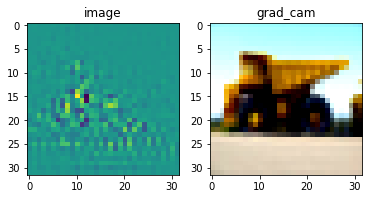

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


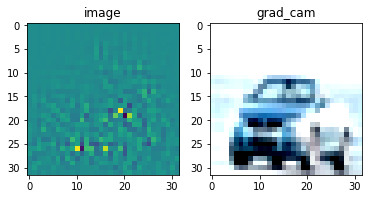

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


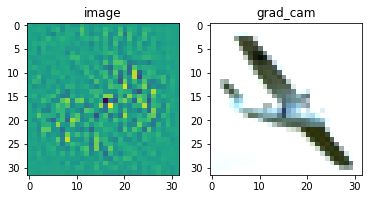

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


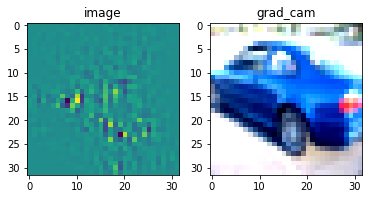

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


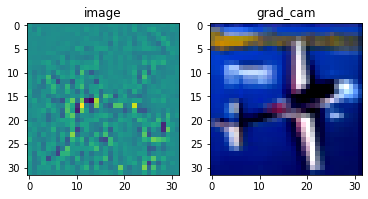

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


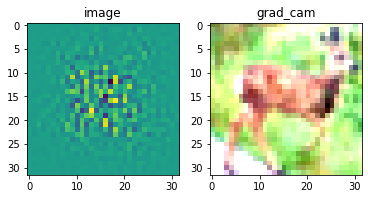

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


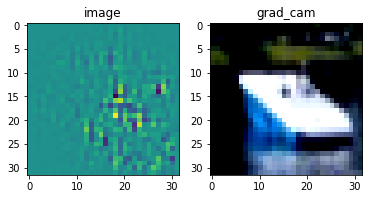

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


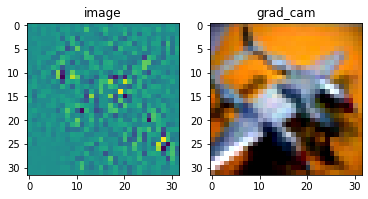

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


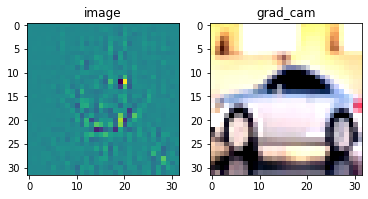

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


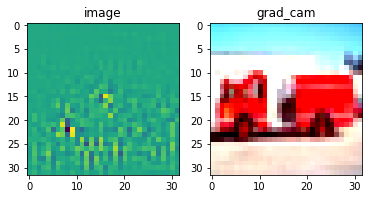

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


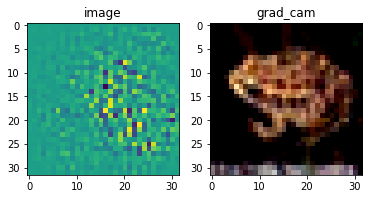

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


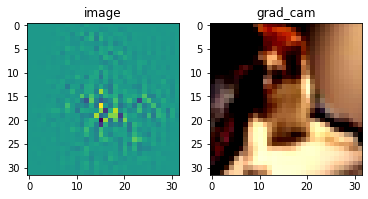

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


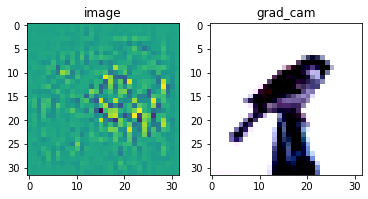

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


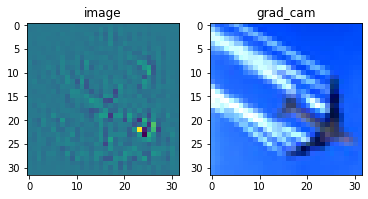

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


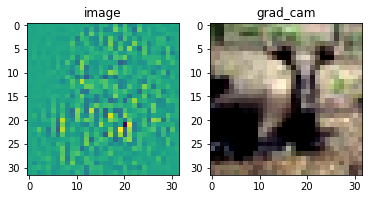

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


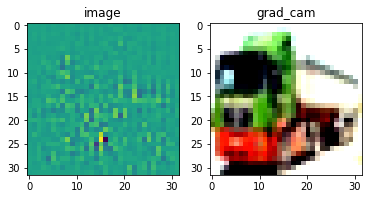

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


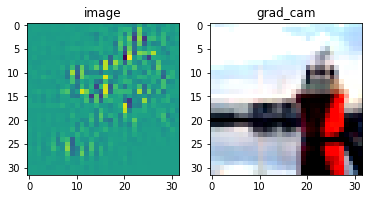

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


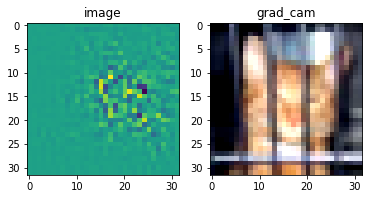

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


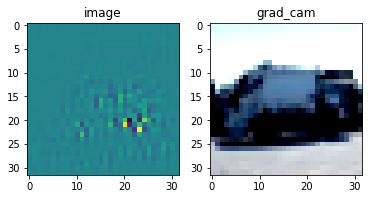

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


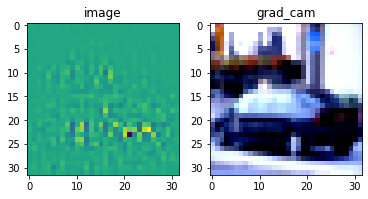

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


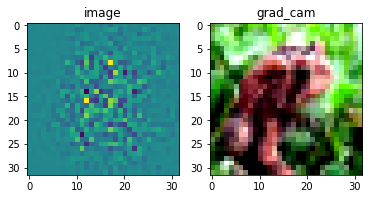

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


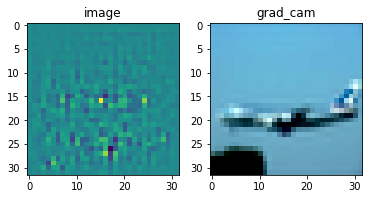

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


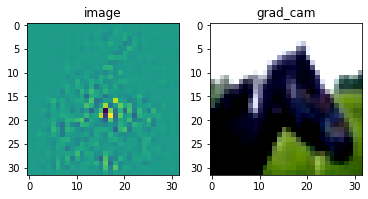

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


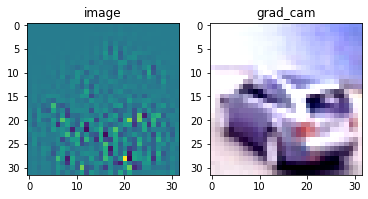

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


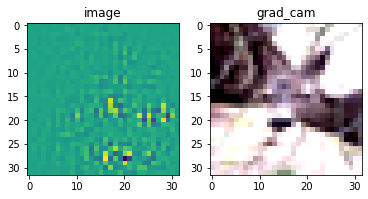

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


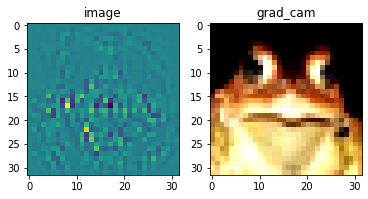

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


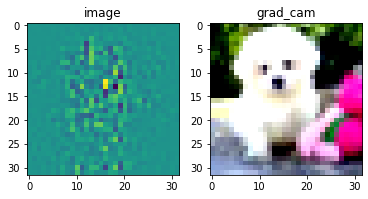

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


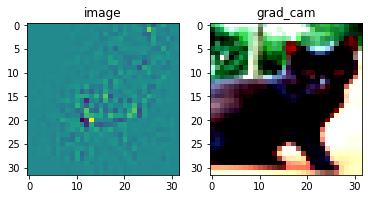

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


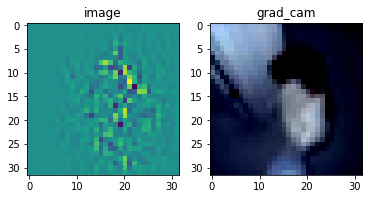

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


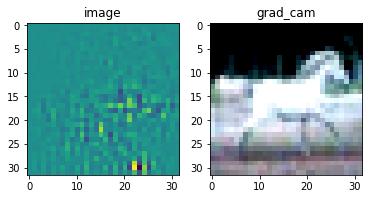

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


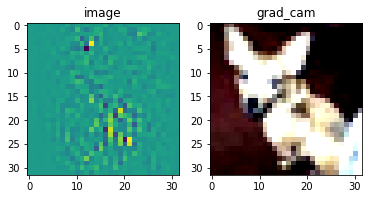

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


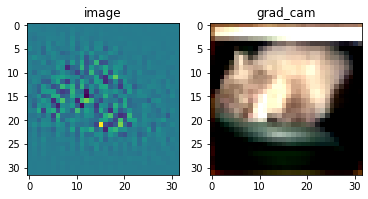

In [44]:
utils.grad_cam.draw_gad_cam(model,device,test_dl)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


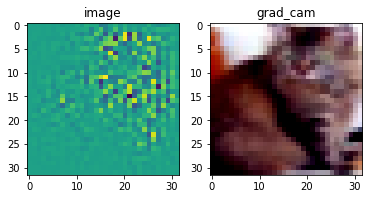

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


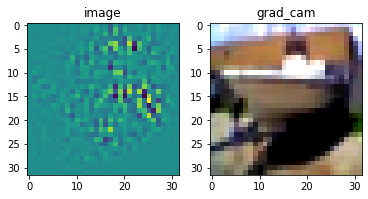

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


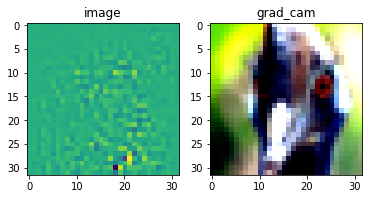

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


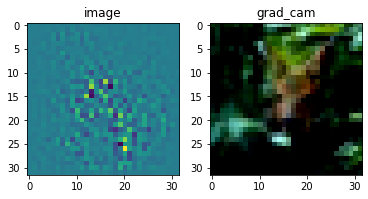

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


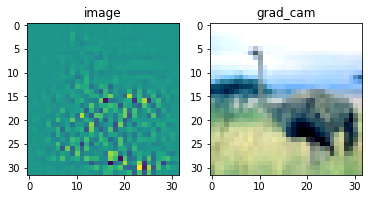

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


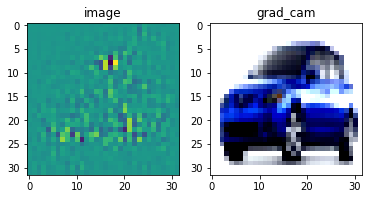

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


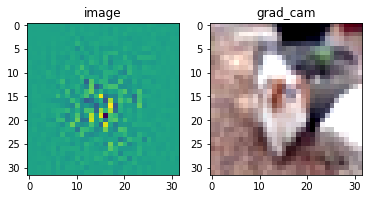

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


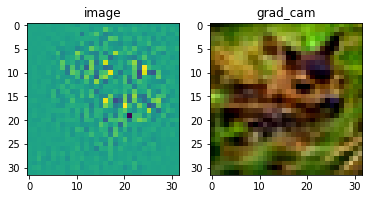

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


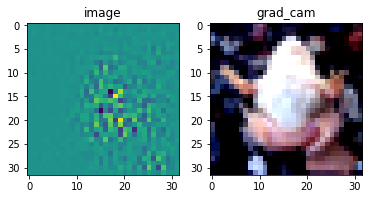

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


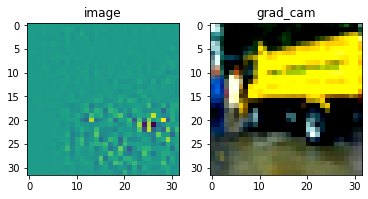

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


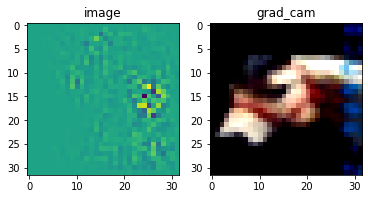

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


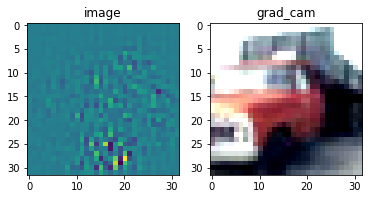

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


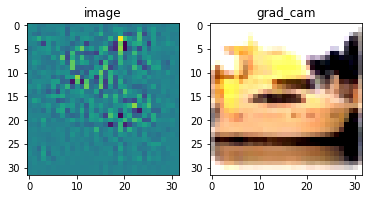

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


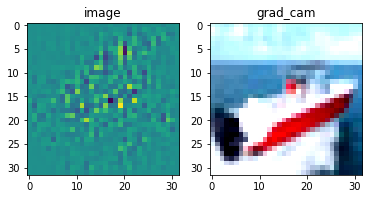

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


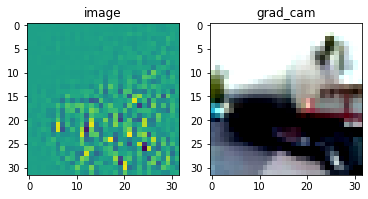

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


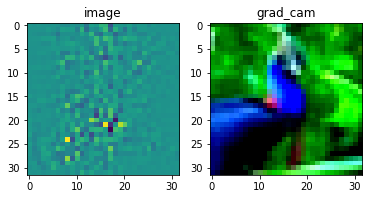

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


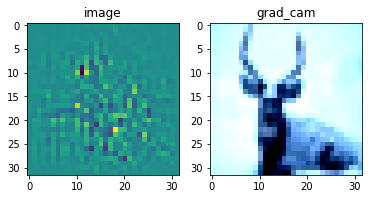

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


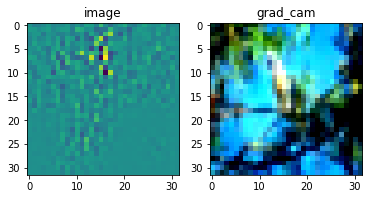

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


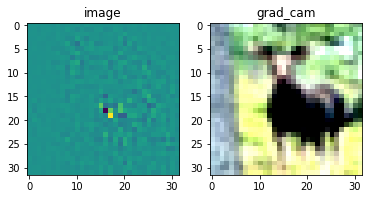

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


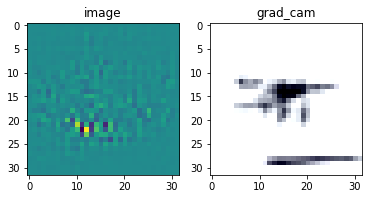

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


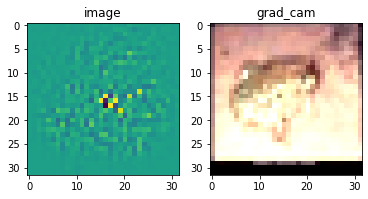

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


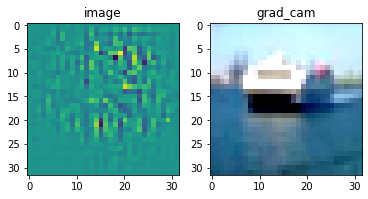

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


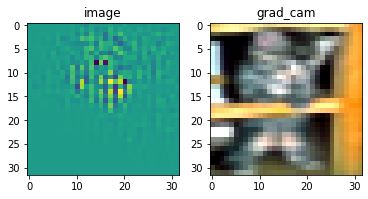

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


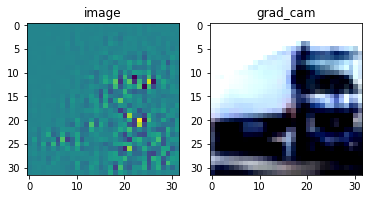

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


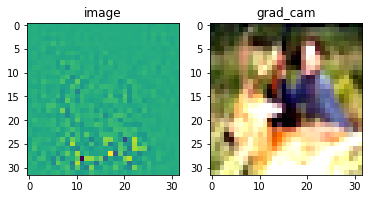

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


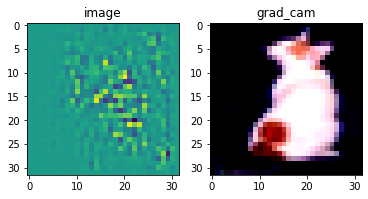

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


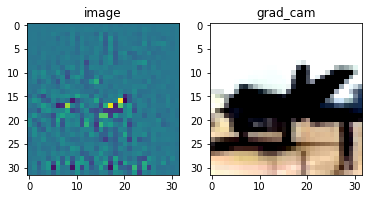

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


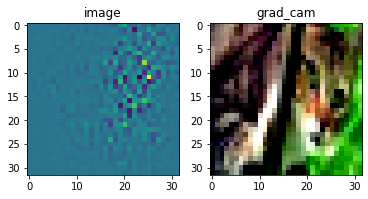

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


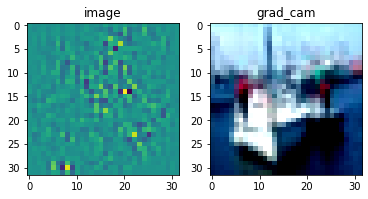

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


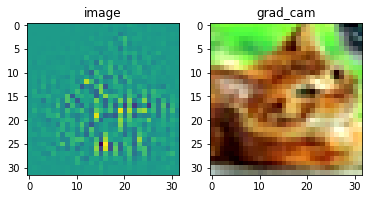

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


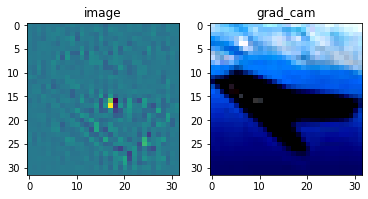

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


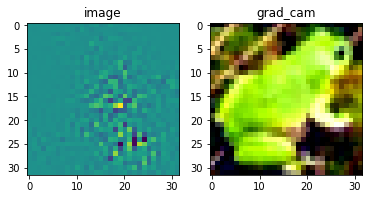

In [50]:
utils.grad_cam.draw_gad_cam(model,device,test_dl)